In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [40]:
# load the data
data=pd.read_csv("C:/Users/VYSHNAVI/Downloads/3.01.+Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Plot the data

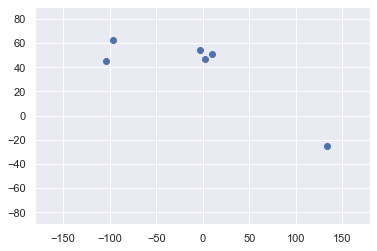

In [41]:
plt.scatter(data['Longitude'],data["Latitude"])
plt.xlim(-180,180)                              # plots countries as if they were plotted in a world map
plt.ylim(-90,90)
plt.show()

# Select the features

In [42]:
# DataFrame.iloc[row_indices,column_indices]
# we do clustering base on geographic area so we need lat and long
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering

In [43]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

# Clustering analysis

In [44]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters                              # all 0's indicate one cluster and all 1 indicate another cluster

array([0, 0, 1, 1, 1, 2])

In [45]:
data_with_clusters=data.copy()
data_with_clusters["Clusters"]=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


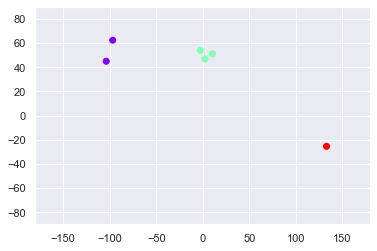

In [46]:
plt.scatter(data['Longitude'],data["Latitude"],c=data_with_clusters["Clusters"],cmap="rainbow")
plt.xlim(-180,180)                              # plots countries as if they were plotted in a world map
plt.ylim(-90,90)
plt.show()

# Clustering using language

In [47]:
data_mapped=data.copy()
data_mapped["Language"]=data_mapped["Language"].map({"English":0,"French":1,"German":2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### selecting the features

In [48]:
x=data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### clustering

In [49]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [50]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [51]:
data_with_clusters=data.copy()
data_with_clusters["Clusters"]=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


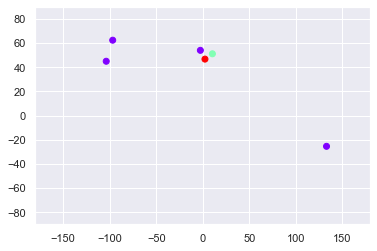

In [52]:
plt.scatter(data['Longitude'],data["Latitude"],c=data_with_clusters["Clusters"],cmap="rainbow")
plt.xlim(-180,180)                              # plots countries as if they were plotted in a world map
plt.ylim(-90,90)
plt.show()

# cluster using long lat and language

In [65]:
x=data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [66]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [67]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [68]:
data_with_clusters=data.copy()
data_with_clusters["Clusters"]=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


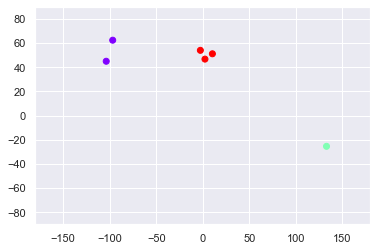

In [69]:
plt.scatter(data['Longitude'],data["Latitude"],c=data_with_clusters["Clusters"],cmap="rainbow")
plt.xlim(-180,180)                              # plots countries as if they were plotted in a world map
plt.ylim(-90,90)
plt.show()

# Selecting the number of clusters

## WCSS method(with in cluster sum of squares)

In [70]:
kmeans.inertia_

290.10523333333333

In [71]:
wcss=[]

# there are 6 countries so let us take cluster wcss for 1 to 6 clusters and check the score
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [72]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

#  The elbow method

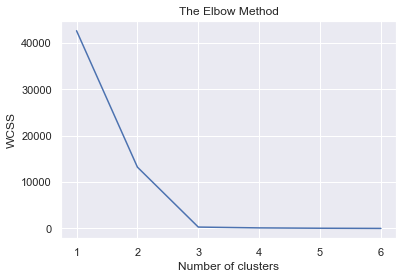

In [74]:
number_clusters=range(1,7)
plt.plot(number_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# MARKET SEGMENTATION EXAMPLE

In [75]:
from sklearn.cluster import KMeans

In [76]:
data1=pd.read_csv("C:/Users/VYSHNAVI/Downloads/3.12.+Example.csv")
data1

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## plot the data


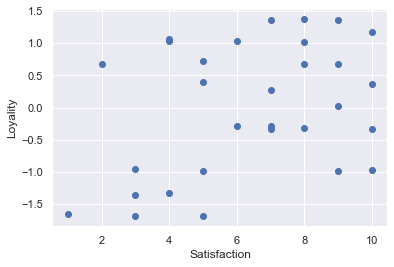

In [78]:
plt.scatter(data1["Satisfaction"],data1["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyality")
plt.show()

## select the features

In [79]:
x1=data1.copy()

# Clustering

In [80]:
kmeans1=KMeans(2)
kmeans1.fit(x1)

KMeans(n_clusters=2)

# Clustering results

In [81]:
clusters1=x1.copy()

In [82]:
clusters1["Cluster_predictions"]=kmeans1.fit_predict(x1)

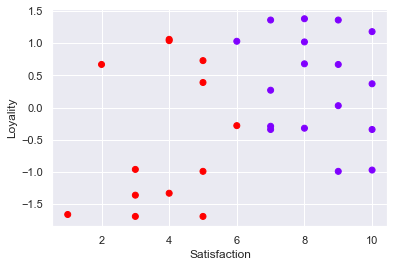

In [85]:
plt.scatter(clusters1["Satisfaction"],clusters1["Loyalty"],c=clusters1["Cluster_predictions"],cmap="rainbow")
plt.xlabel("Satisfaction")                      #this clustering takes only satisfaction into consideratio                                               
plt.ylabel("Loyality")                           # bcoz the loyality scale is less so to take both into account
plt.show()                                        # we need to do standerdisation  

## standardize the variable

In [99]:
from sklearn import preprocessing        # standardize means standardising that to N~(0,1)  mean=0 andf varience=1
x_scaled=preprocessing.scale(x1)
x_scaled                                 # the other one is already standardized

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Take the advantage of elbow method

In [108]:
wcss=[]
for i in range(1,10):
    kmeans_iter=KMeans(i)
    kmeans_iter.fit(x_scaled)
    wcss_iter=kmeans_iter.inertia_
    wcss.append(wcss_iter)
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.348079410290981,
 4.358871893303257,
 3.8593505244765893]

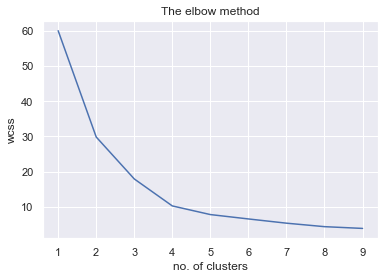

In [109]:
number_of_clusters=range(1,10)
plt.plot(number_of_clusters,wcss)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.title("The elbow method")
plt.show()

# Exploring the cluster solutions and select the number of clusters

In [121]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x1.copy()
cluster_new["cluster pred"]=kmeans_new.fit_predict(x_scaled)
cluster_new[["scaled_satisfaction","scaled_loyality"]]=x_scaled
cluster_new

,Satisfaction,Loyalty,cluster pred,scaled_satisfaction,scaled_loyality
0,4,-1.33,2,-0.931381,-1.331811
1,6,-0.28,1,-0.155230,-0.281171
2,5,-0.99,2,-0.543305,-0.991604
3,7,-0.29,1,0.232845,-0.291177
4,4,1.06,3,-0.931381,1.059645
5,1,-1.66,2,-2.095606,-1.662012
6,10,-0.97,1,1.397071,-0.971592
7,8,-0.32,1,0.620920,-0.321196
8,8,1.02,0,0.620920,1.019621
9,8,0.68,0,0.620920,0.679414


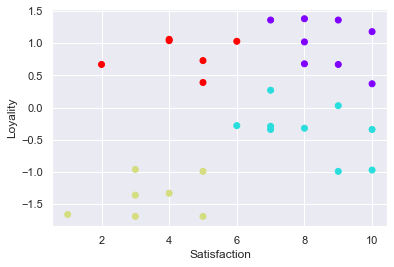

In [122]:
# graph for the normal parameters
plt.scatter(cluster_new["Satisfaction"],cluster_new["Loyalty"],c=cluster_new["cluster pred"],cmap="rainbow")
plt.xlabel("Satisfaction")                                                                     
plt.ylabel("Loyality")                          
plt.show()

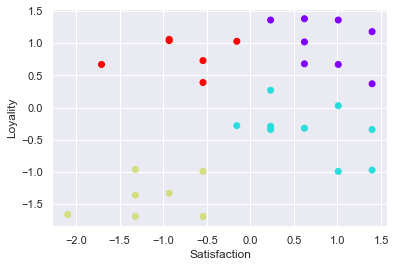

In [123]:
# graph using the scaled ones
plt.scatter(cluster_new["scaled_satisfaction"],cluster_new["scaled_loyality"],c=cluster_new["cluster pred"],cmap="rainbow")
plt.xlabel("Satisfaction")                                                                     
plt.ylabel("Loyality")                   
plt.show()
# alienated-low satisfaction and low loyality
# supporters- low satisfaction and high loyality
# fans - highly satisfied and highly loyal
# roamers - high satisfied and low loyal


# HEAT MAPS AND DENDOGRAMS

## IMPORT RELAVENT LIBRARIES

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [125]:
data_=pd.read_csv("C:/Users/VYSHNAVI/Downloads/Country+clusters+standardized.csv" , index_col="Country")

In [130]:
x_scaled_new=data_.copy()
x_scaled_new=x_scaled_new.drop(["Language"],axis=1)
x_scaled_new

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


# Plot the data

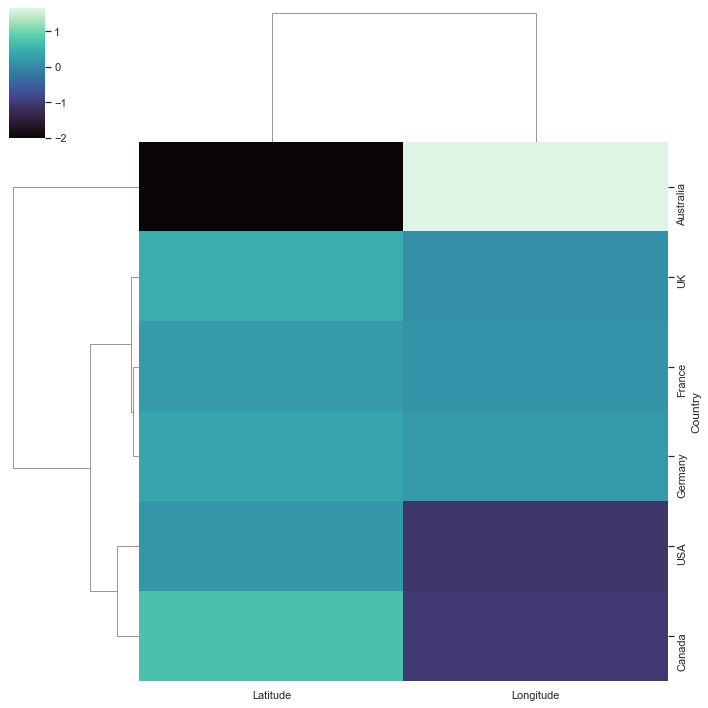

In [131]:
sns.clustermap(x_scaled_new,cmap="mako")